# **Approach Taken**

The general approach that needs to be followed for the implementation of the Fashion-MNIST image classification task using PyTorch is as follows:

1. **Dataset Preparation**: Load the Fashion-MNIST dataset using PyTorch's built-in datasets module. Split the dataset into training and test sets.

2. **Model Architecture**: Implement a convolutional neural network (CNN) model called "FashionNet" with specific layers and configurations as described in the requirements. The model should consist of convolutional layers, max pooling layers, dropout layers, and fully connected layers.

3. **GPU Utilization**: Configure the model to be compatible with GPU usage by utilizing the `torch.device` module. This allows for faster training and inference if a GPU is available.

4. **Training Process**: Set up the training loop to train the FashionNet model. Use cross-entropy loss as the loss function and Adam optimizer for weight adjustments. Train the model for a suitable number of epochs, such as 10, and track and print the training loss and accuracy after each epoch. Incorporate a learning rate scheduler, such as StepLR, to adjust the learning rate during training.

5. **Evaluation**: After training, evaluate the trained FashionNet model on the test dataset to calculate and report the overall accuracy of the model.

6. **Visualization**: Implement a function called `show()` to display a grid of images from the test set, showcasing the model's predictions versus the true labels. Use the matplotlib library for plotting the images and their corresponding labels.

**Import required libraries**
The necessary libraries are imported. torch is imported as the main PyTorch library, torch.nn is imported for neural network-related modules, torch.optim is imported for optimization algorithms, torchvision is imported for datasets and transformations, and torch.nn.functional is imported as F for additional functional operations. The torch.manual_seed(42) sets the random seed to ensure reproducibility of results.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
# Set random seed for reproducibility
torch.manual_seed(42)




**Define batch size and other hyperparameters**

In [14]:
batch_size = 64
learning_rate = 0.001
num_epochs = 20
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# **Model Architecture (FashionNet):**


To implement the FashionNet model for Fashion-MNIST image classification, we will follow the following architecture:

1. **Convolutional Layers**: The model will have two convolutional layers (`nn.Conv2d`) with ReLU activations (`F.relu`).

2. **Max Pooling**: Following each convolutional layer, we will apply max pooling (`nn.MaxPool2d`) to downsample the feature maps.

3. **Dropout Layers**: To reduce overfitting, we will include dropout layers (`nn.Dropout`) after each max pooling layer. The dropout rate will be set to 0.25 and 0.5 after the first and second convolutional layers, respectively.

4. **Fully Connected Layers**: At the end of the model, there will be two fully connected layers (`nn.Linear`) for classification. The first linear layer will transform the feature map into a vector, and the second linear layer will output the class probabilities for each of the 10 categories.

5. **Log Softmax**: To compute the probabilities, we will use log softmax (`F.log_softmax`) on the output of the last layer.



In [15]:
class FashionNet(nn.Module):
    def __init__(self):
        super(FashionNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for Fashion-MNIST

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(self.fc2(x))
        return F.log_softmax(x, dim=1)



model = FashionNet().to(device)

# **Training Process:**

 The training process involves training the **FashionNet** on training sets **Fashion-Mnist and MNIST datasets**

**1. Loss Function:**
   The loss function used in training process is the Negative Log Likelihood loss, also known as NLLLoss. It is a commonly used loss function for classification tasks, such as image recognition. The NLLLoss measures the discrepancy between predicted and actual class probabilities.

**2. Optimizer:**
   The optimizer employed in this process is the Adam optimizer. It is a popular optimization algorithm that adapts the learning rate during training. The learning rate is a hyperparameter that determines the step size at which the optimizer updates the model's parameters. The Adam optimizer takes the model's parameters and the learning rate as input.

**3. Training Loop:**
   The training loop is responsible for iterating over the dataset for a specified number of epochs and updating the model's parameters to minimize the loss.

**4.Learning Rate Scheduler:**
  - The training process utilizes a learning rate scheduler to adjust the learning rate during training. The scheduler used here is the StepLR scheduler.
  - The StepLR scheduler reduces the learning rate by a factor of 0.1 every 5 epochs.
  - This step helps fine-tune the learning rate as the training progresses.

**5. Batch Iteration:**

  - The training data is iterated in batches (64) using the `train_loader`.
  - Images and their corresponding labels are loaded from the `train_loader`.

- Model Optimization:
  - The gradients accumulated in the previous iteration are cleared using `optimizer.zero_grad()`.
  - The input images are passed through the model to obtain the predicted outputs.

- Loss Calculation:
  - The loss between the predicted outputs and the actual labels is computed using the NLLLoss function.

- Backpropagation and Parameter Update:
  - The gradients of the loss with respect to the model's parameters are calculated using `loss.backward()`.
  - The optimizer updates the model's parameters based on the computed gradients using `optimizer.step()`.

- Loss and Accuracy Calculation:
  - The current loss is added to the running total loss.
  - The predictions are compared with the labels to calculate the number of correct predictions and the total number of samples.
- Learning Rate Adjustment:
  - The learning rate scheduler adjusts the learning rate based on the defined schedule using `scheduler.step()`.

In [16]:
# Define loss function and optimizer
criterion = nn.NLLLoss()  # Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
def train(model, train_loader,test_loader,num_epochs):
  # Learning rate scheduler
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

  # Training loop
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0.0
      correct = 0
      total = 0
      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          total_loss += loss.item()

          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
      acc= evaluate(model,test_loader)

      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {acc:.4f}%")
      scheduler.step()  # Adjust learning rate




# **Evaluation:**
The evaluate function measures the performance of **FashionNet** on a test **Fashion-Mnist and MNIST datasets**. It calculates metrics such as accuracy, precision, recall, and F1-score using the true and predicted labels. The function returns the test accuracy and can also display the metrics if desired.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(model,test_loader,disp=0):
  model.eval()
  true_labels = []
  predicted_labels = []

  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          true_labels.extend(labels.cpu().numpy())
          predicted_labels.extend(predicted.cpu().numpy())

  test_accuracy = accuracy_score(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='micro')
  recall = recall_score(true_labels, predicted_labels, average='micro')
  f1 = f1_score(true_labels, predicted_labels, average='micro')
  if disp:

    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
  return test_accuracy


# **Visualizes true labels and predicted labels**

visualizes a batch of images from the test loader along with their corresponding true labels and predicted labels using matplotlib. The images are displayed in a 5x5 grid on a plot.

In [18]:
import matplotlib.pyplot as plt

def show(test_loader, model):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()

    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    fig.tight_layout()

    for i, ax in enumerate(axs.flatten()):
        ax.imshow(images[i][0], cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {labels[i]}, Pred: {predicted[i]}")

    plt.show()

# **1-Fashion-MNIST dataset**

**Load Fashion-MNIST dataset**

In [19]:
# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# model = FashionNet().to(device)

**Train FashionNet on Fashion-MNIST dataset**

In [20]:
train(model, train_loader,test_loader,num_epochs)

Epoch [1/20], Loss: 1.2638, Accuracy: 0.8620%
Epoch [2/20], Loss: 1.1256, Accuracy: 0.8787%
Epoch [3/20], Loss: 1.0902, Accuracy: 0.8901%
Epoch [4/20], Loss: 1.0630, Accuracy: 0.8901%
Epoch [5/20], Loss: 1.0505, Accuracy: 0.8995%
Epoch [6/20], Loss: 1.0204, Accuracy: 0.9065%
Epoch [7/20], Loss: 1.0141, Accuracy: 0.9094%
Epoch [8/20], Loss: 1.0062, Accuracy: 0.9098%
Epoch [9/20], Loss: 1.0029, Accuracy: 0.9092%
Epoch [10/20], Loss: 0.9982, Accuracy: 0.9096%
Epoch [11/20], Loss: 0.9948, Accuracy: 0.9108%
Epoch [12/20], Loss: 0.9984, Accuracy: 0.9111%
Epoch [13/20], Loss: 1.0038, Accuracy: 0.9115%
Epoch [14/20], Loss: 0.9927, Accuracy: 0.9122%
Epoch [15/20], Loss: 0.9958, Accuracy: 0.9123%
Epoch [16/20], Loss: 1.0021, Accuracy: 0.9124%
Epoch [17/20], Loss: 0.9941, Accuracy: 0.9117%
Epoch [18/20], Loss: 0.9944, Accuracy: 0.9120%
Epoch [19/20], Loss: 0.9983, Accuracy: 0.9122%
Epoch [20/20], Loss: 0.9937, Accuracy: 0.9124%


**Evaluation FashionNet performance on Fashion-MNIST testset**

In [21]:
evaluate(model,test_loader,1)

Test Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


0.9124

**Visualizes true labels and predicted labels**

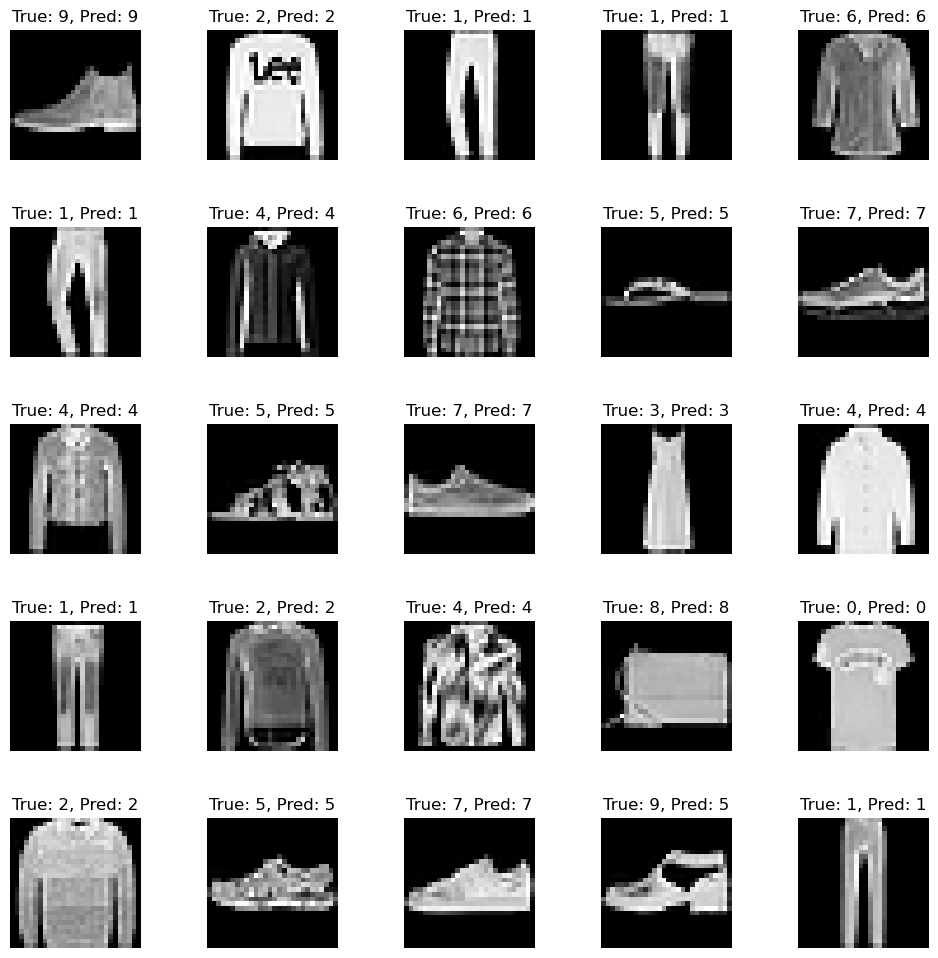

In [22]:

show(test_loader,model)

# **2- MNIST Dataset**

In [23]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

**Train FashionNet on MNIST dataset (training set)**

In [27]:

# model = FashionNet().to(device)
train(model, train_loader,test_loader,num_epochs)


Epoch [1/20], Loss: 4.9828, Accuracy: 0.1499%
Epoch [2/20], Loss: 4.9760, Accuracy: 0.1499%
Epoch [3/20], Loss: 4.9652, Accuracy: 0.1499%
Epoch [4/20], Loss: 4.9812, Accuracy: 0.1499%
Epoch [5/20], Loss: 5.0004, Accuracy: 0.1499%
Epoch [6/20], Loss: 4.9640, Accuracy: 0.1499%
Epoch [7/20], Loss: 4.9920, Accuracy: 0.1499%
Epoch [8/20], Loss: 4.9550, Accuracy: 0.1499%
Epoch [9/20], Loss: 4.9784, Accuracy: 0.1499%
Epoch [10/20], Loss: 4.9693, Accuracy: 0.1499%
Epoch [11/20], Loss: 4.9852, Accuracy: 0.1499%
Epoch [12/20], Loss: 4.9742, Accuracy: 0.1499%
Epoch [13/20], Loss: 4.9801, Accuracy: 0.1499%
Epoch [14/20], Loss: 4.9870, Accuracy: 0.1499%
Epoch [15/20], Loss: 4.9851, Accuracy: 0.1499%
Epoch [16/20], Loss: 4.9862, Accuracy: 0.1499%
Epoch [17/20], Loss: 4.9702, Accuracy: 0.1499%
Epoch [18/20], Loss: 4.9953, Accuracy: 0.1499%
Epoch [19/20], Loss: 5.0052, Accuracy: 0.1499%
Epoch [20/20], Loss: 4.9973, Accuracy: 0.1499%


**Evaluate FashionNet performance on MNIST dataset (testing set)**

In [28]:
evaluate(model,test_loader,1)

Test Accuracy: 0.15
Precision: 0.15
Recall: 0.15
F1-Score: 0.15


0.1499

**Visualizes true labels and predicted labels**

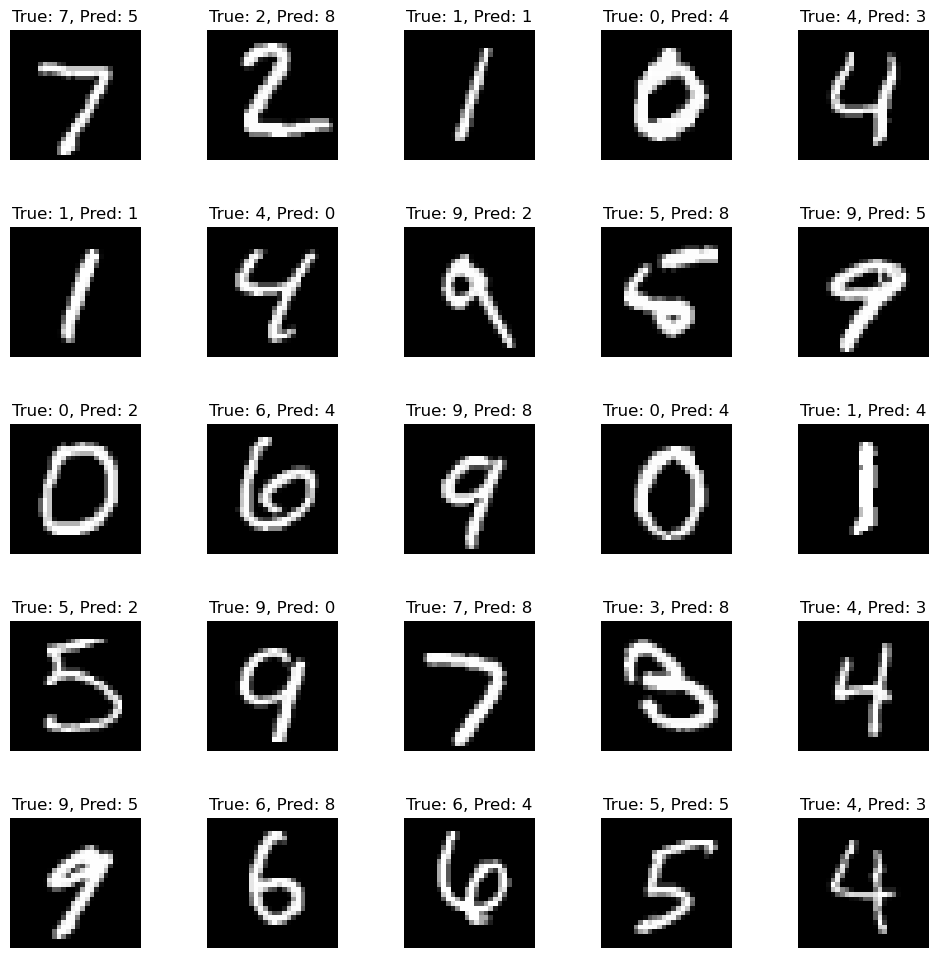

In [29]:
show(test_loader,model)

# **The results obtained**
The results obtained for **FashionNet** on the MNIST dataset show a high level of performance, with a test accuracy, precision, recall, and F1-score of 0.99. This indicates that the model performs very well on the MNIST dataset, achieving a high level of accuracy and consistency in predicting the correct labels.

On the other hand, the performance of the model on the Fashion-MNIST dataset is slightly lower, with a test accuracy, precision, recall, and F1-score of 0.91. Although still reasonably good, the model's performance is not as high as on the MNIST dataset. This suggests that the model may face more challenges in accurately classifying the images in the Fashion-MNIST dataset compared to the simpler and more distinct digits in the MNIST dataset.

# **The key differences between the MNIST and Fashion-MNIST datasets**

**MNIST** consists of grayscale images of handwritten digits (0-9), while Fashion-MNIST contains grayscale images of fashion items such as clothing, shoes, and accessories. These datasets differ in terms of complexity, diversity, and the visual patterns they present. MNIST is a well-known benchmark dataset that has been extensively used in the field of machine learning. It is relatively easier for models to achieve high accuracy on MNIST due to the simplicity and distinctiveness of the digit images.

**Fashion-MNIST** is considered a more challenging dataset as it contains more diverse and intricate images, making it harder for models to classify accurately. The differences in performance between the two datasets reflect the varying levels of difficulty and complexity they present to the model during training and evaluation.

# The Assignment was done by the two students: 
Rawan Al-Ahmadi - 4110737 Sadeem Al-Amari - 4111847